In [1]:
import corneto as cn
import corneto.methods.signal.cellnopt_ilp as cno

# Introduction to a Boolean model

This notebook is to show the basic modeling procedure with cellnopt ILP implemented in CORNETO. 

As a first step we define start with a small network and corresponding datasets just to illustrate the concepts. 
The prior knowledge network of 'G1' contains three nodes, EGF, TNFa and Ras. Edges show the potential activation of the RAS protein. 

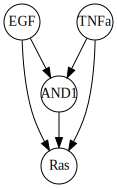

In [2]:
# Definition of the prior knowledge network
G1 = cn.Graph.from_sif_tuples(
    [
        ("EGF", 1, "AND1"),
        ("TNFa", 1, "AND1"),
        ("AND1", 1, "Ras"),
        ("EGF", 1, "Ras"),
        ("TNFa", 1, "Ras"),
    ]
)
G1.plot()

Now, we organize some in-silico experimental data into a format that can be used by the CNO toolbox.

First, we define 4 conditions (exp0 ... exp3). In each condition, the activated nodes (EGF or TNFa) are set to 1 and the non-activated nodes to 0.
We also define the values of the corresponding outputs (Ras).

Note that the output, Ras is only active (1.0) in the 4th condition, when both of the inputs are also activated. This corresponds to an AND relationship: RAS is active only if both EGF and TNFa are activated.
We expect that the optimization finds the correct subgraph of the above network, which contains only the 3 nodes with the AND gates, while individual edges from EGF and TNFa to RAS are removed. 

In [3]:
# RAS is only active iff both EGF and TNFa are active -> we need to identify the AND gate
exp_list_G1_and = {
    "exp0": {"input": {"EGF": 0, "TNFa": 0}, "output": {"Ras": 0}},
    "exp1": {"input": {"EGF": 1, "TNFa": 0}, "output": {"Ras": 0}},
    "exp2": {"input": {"EGF": 0, "TNFa": 1}, "output": {"Ras": 0}},
    "exp3": {"input": {"EGF": 1, "TNFa": 1}, "output": {"Ras": 1}},
}

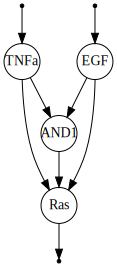

In [4]:
G1_prep = cno.expand_graph_for_flows(G1, exp_list_G1_and)
G1_prep.plot()

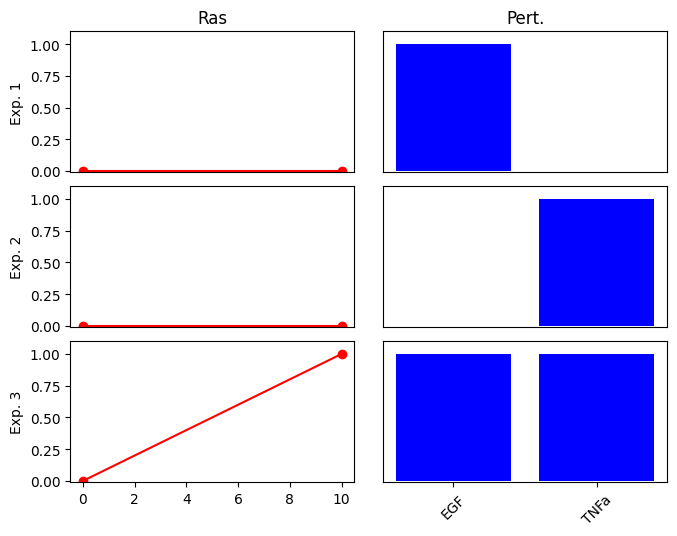

In [6]:
cno.plot_data(exp_list_G1_and)

In [ ]:
P = cno.cellnoptILP(G1_prep, exp_list_G1_and, verbose=False)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-04


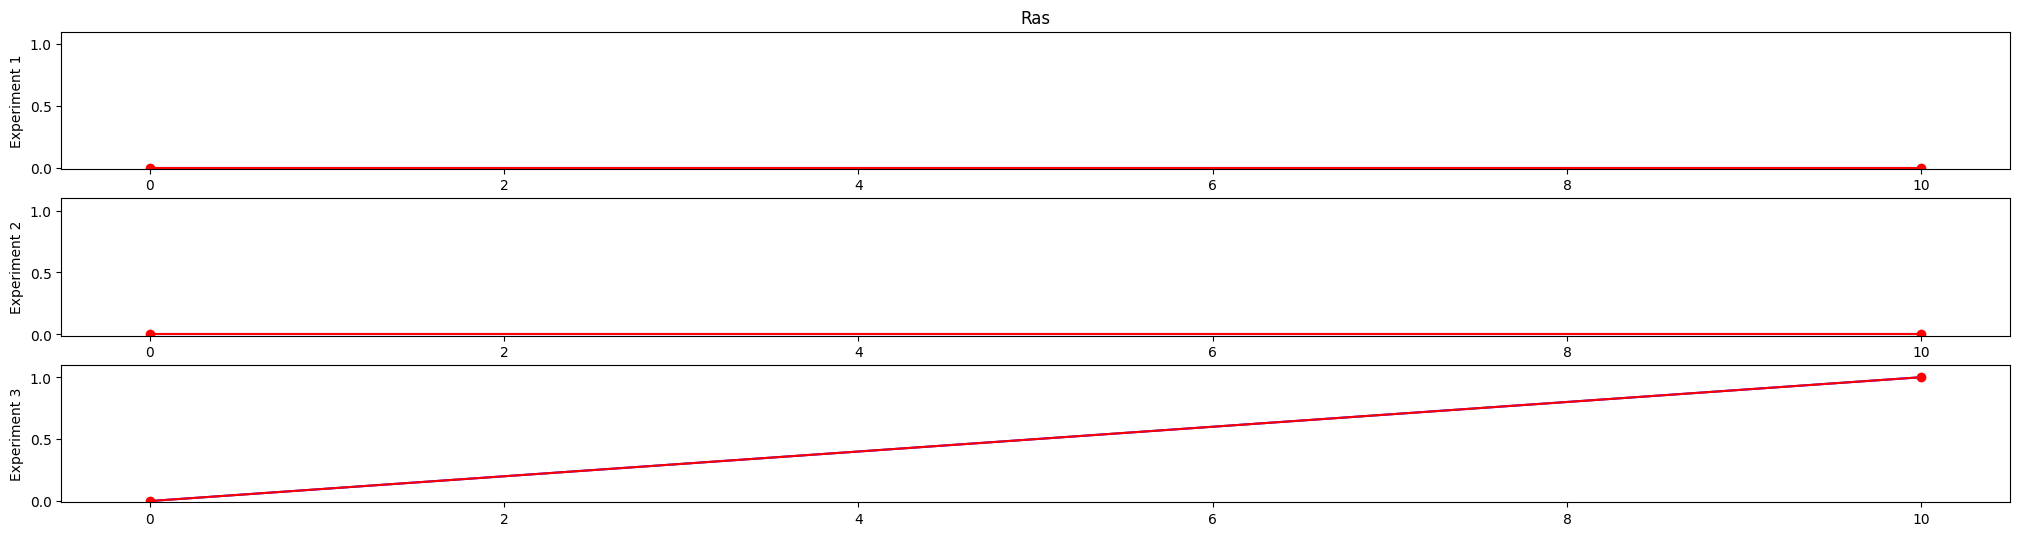

In [6]:
cno.plot_fitness(G1, exp_list_G1_and, P, measured_only=True)

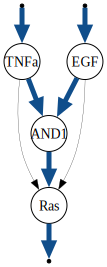

In [7]:
G1_prep.plot(
    custom_edge_attr=cno.cno_style(P, flow_name="edge_activates", scale=None, iexp=3)
)

Tasks: 
1. modify the experiments so that it corresponds to a scenario where only EGF could activate RAS, but not TNFa. 
2. modify the experiments so that it corresponds to a scenario where both TNFa or EGF could activate RAS.


## Inhibition: !EGF activates RAS


Let's define the same network but now we will add an inhibition of EGF on RAS. This means that if EGF is active, RAS should be inactive.
Note the difference in the definition of the prior knowledge network.

We also change the experiments so that the output RAS is active only when TNFa is active.

In [8]:
# Test graph
G2 = cn.Graph.from_sif_tuples(
    [
        ("EGF", -1, "AND1"),
        ("TNFa", 1, "AND1"),
        ("AND1", 1, "Ras"),
        ("EGF", -1, "Ras"),
        ("TNFa", 1, "Ras"),
    ]
)

# RAS is only active iff both EGF and TNFa are active -> we need to idetify the AND gate
exp_list_G2_egf = {
    "exp0": {"input": {"EGF": 0, "TNFa": 0}, "output": {"Ras": 1}},
    "exp1": {"input": {"EGF": 1, "TNFa": 0}, "output": {"Ras": 0}},
    "exp2": {"input": {"EGF": 0, "TNFa": 1}, "output": {"Ras": 1}},
    "exp3": {"input": {"EGF": 1, "TNFa": 1}, "output": {"Ras": 0}},
}

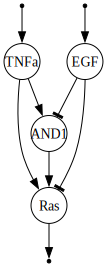

In [9]:
G2_prep = cno.expand_graph_for_flows(G2, exp_list_G2_egf)
G2_prep.plot()

In [10]:
P2 = cno.cellnoptILP(G2_prep, exp_list_G2_egf, verbose=False)

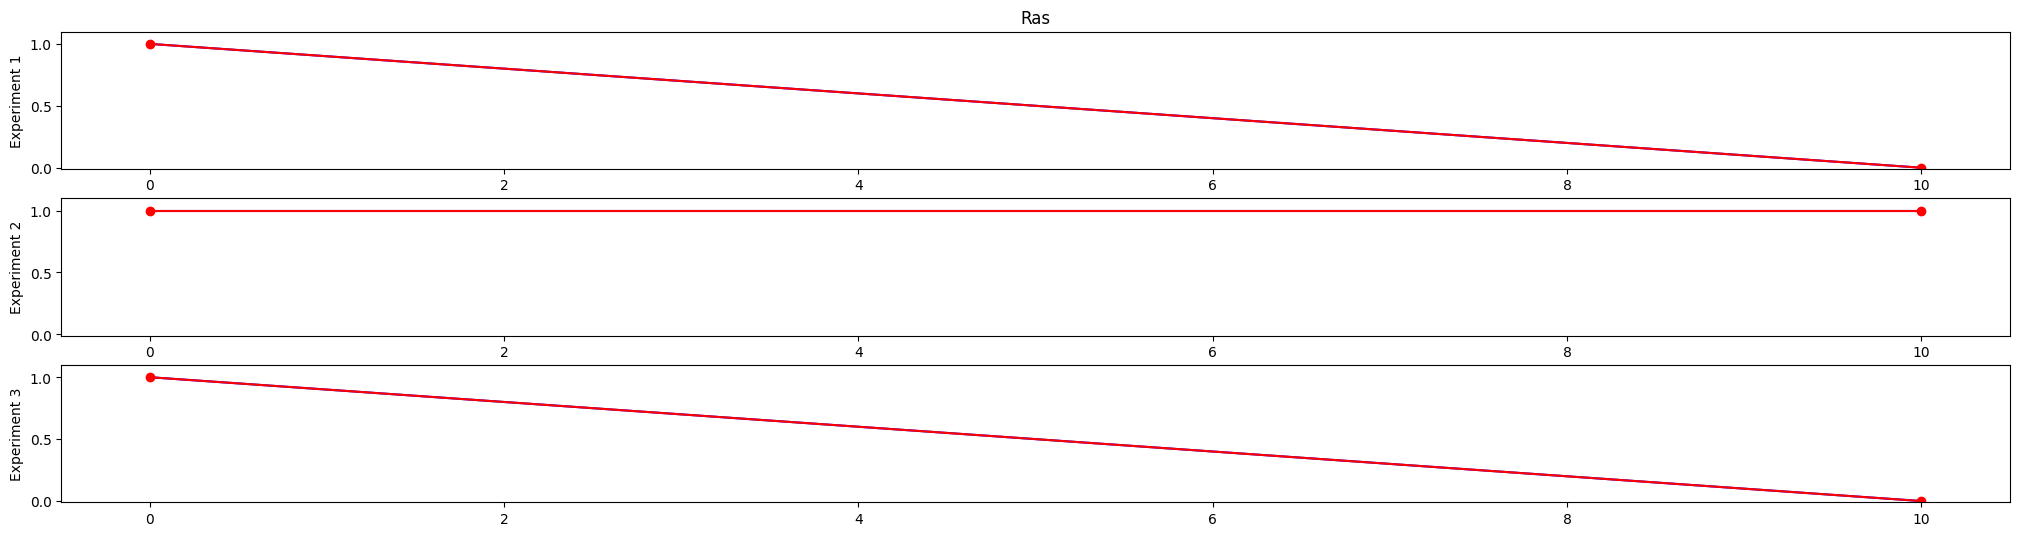

In [11]:
cno.plot_fitness(G2_prep, exp_list_G2_egf, P2, measured_only=True)

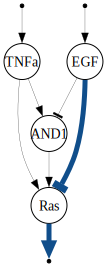

In [12]:
G2_prep.plot(
    custom_edge_attr=cno.cno_style(P2, flow_name="edge_activates", scale=None, iexp=0)
)

## Inhibition with AND gates

Please remember, inhibitions are added to the incoming edge of the AND node. The outgoing edges of the AND node are always activating by convention.

In [13]:
# Test graph
G2 = cn.Graph.from_sif_tuples(
    [
        ("EGF", -1, "AND1"),
        ("TNFa", 1, "AND1"),
        ("AND1", 1, "Ras"),
        ("EGF", -1, "Ras"),
        ("TNFa", 1, "Ras"),
    ]
)

# RAS is only active iff both EGF and TNFa are active -> we need to idetify the AND gate
exp_list_G2_and = {
    "exp0": {"input": {"EGF": 0, "TNFa": 0}, "output": {"Ras": 0}},
    "exp1": {"input": {"EGF": 1, "TNFa": 0}, "output": {"Ras": 0}},
    "exp2": {"input": {"EGF": 0, "TNFa": 1}, "output": {"Ras": 1}},
    "exp3": {"input": {"EGF": 1, "TNFa": 1}, "output": {"Ras": 0}},
}

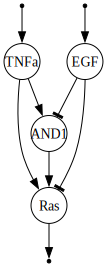

In [14]:
G2_prep = cno.expand_graph_for_flows(G2, exp_list_G2_and)
G2_prep.plot()

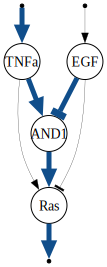

In [15]:
P2 = cno.cellnoptILP(G2_prep, exp_list_G2_and, verbose=False)
G2_prep.plot(
    custom_edge_attr=cno.cno_style(P2, flow_name="edge_activates", scale=None, iexp=2)
)

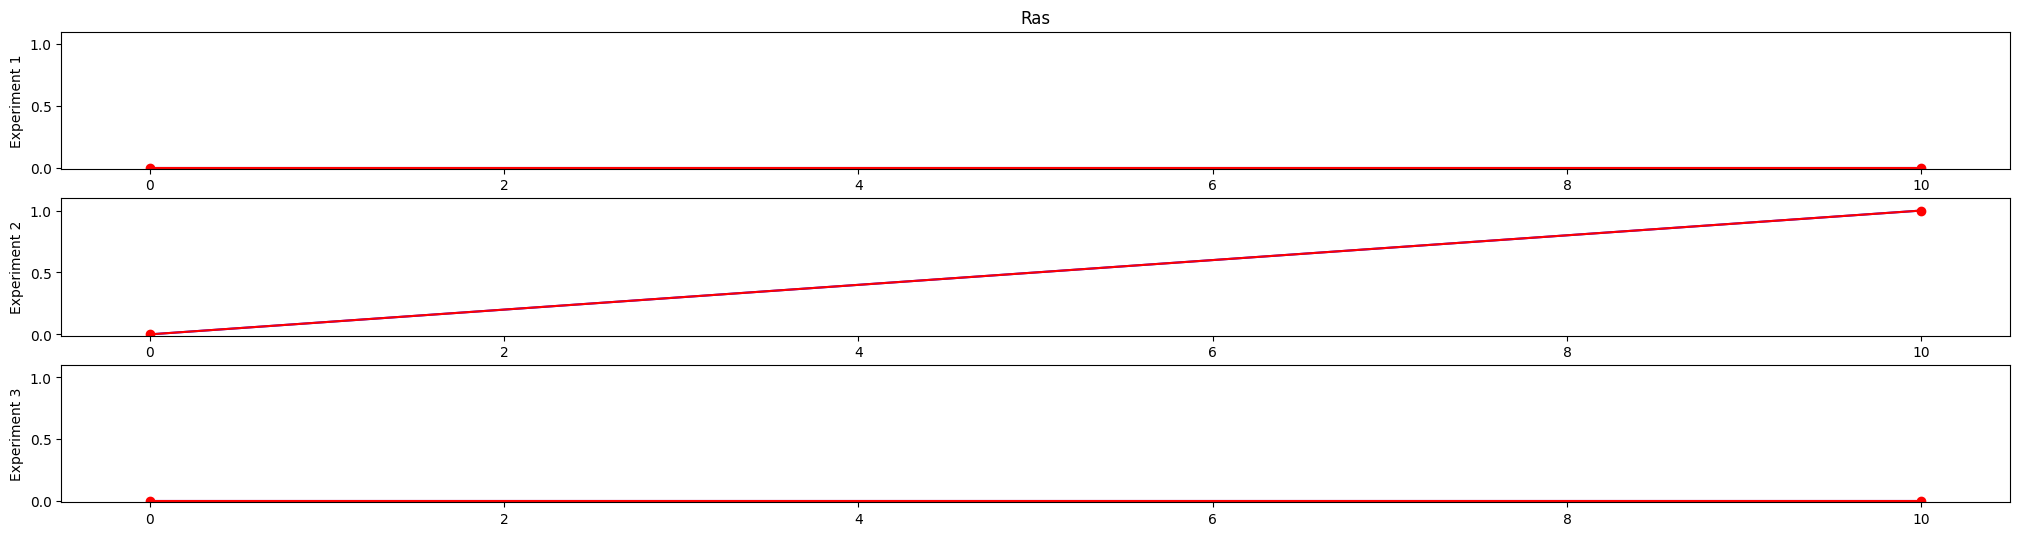

In [16]:
cno.plot_fitness(G2_prep, exp_list_G2_and, P2, measured_only=True)

# Complex case study with inhibition

Let's look at a more realistic case study which contains a larger network and more experiments.

Also note that the we define inhibition in the experimental description. This could be, for example, the effect of small molecule kinase inhibitor. 



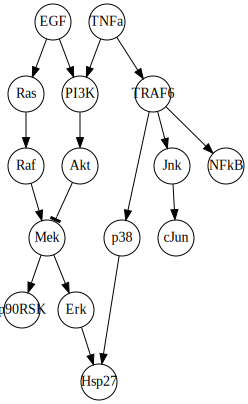

In [8]:
G3 = cn.Graph.from_sif_tuples(
    [
        ("EGF", 1, "Ras"),
        ("EGF", 1, "PI3K"),
        ("TNFa", 1, "PI3K"),
        ("TNFa", 1, "TRAF6"),
        ("TRAF6", 1, "p38"),
        ("TRAF6", 1, "Jnk"),
        ("TRAF6", 1, "NFkB"),
        ("Jnk", 1, "cJun"),
        ("p38", 1, "Hsp27"),
        ("PI3K", 1, "Akt"),
        ("Ras", 1, "Raf"),
        ("Raf", 1, "Mek"),
        ("Akt", -1, "Mek"),
        ("Mek", 1, "p90RSK"),
        ("Mek", 1, "Erk"),
        ("Erk", 1, "Hsp27"),
    ]
)
# G3.add_edge((), 'EGF')
# G3.add_edge((), 'TNFa')
# G3.add_edge('Akt', ())
# G3.add_edge('cJun', ())
# G3.add_edge('Hsp27', ())
# G3.add_edge('NFkB', ())
# G3.add_edge('Erk', ())
# G3.add_edge('p90RSK', ())
# G3.add_edge('Jnk', ())

exp_list_toy_full = {
    "exp0": {
        "input": {"EGF": 0, "TNFa": 0},
        "inhibition": {},
        "output": {
            "Akt": 0,
            "Hsp27": 0,
            "NFkB": 0,
            "Erk": 0,
            "p90RSK": 0,
            "Jnk": 0,
            "cJun": 0,
        },
    },
    "exp1": {
        "input": {"EGF": 1, "TNFa": 0},
        "inhibition": {},
        "output": {
            "Akt": 0.91,
            "Hsp27": 0,
            "NFkB": 0.86,
            "Erk": 0.8,
            "p90RSK": 0.88,
            "Jnk": 0,
            "cJun": 0,
        },
    },
    "exp2": {
        "input": {"EGF": 0, "TNFa": 1},
        "inhibition": {},
        "output": {
            "Akt": 0.82,
            "Hsp27": 0.7,
            "NFkB": 0.90,
            "Erk": 0.0,
            "p90RSK": 0.0,
            "Jnk": 0.25,
            "cJun": 0.4,
        },
    },
    "exp3": {
        "input": {"EGF": 1, "TNFa": 1},
        "inhibition": {},
        "output": {
            "Akt": 0.91,
            "Hsp27": 0.7,
            "NFkB": 0.90,
            "Erk": 0.8,
            "p90RSK": 0.88,
            "Jnk": 0.25,
            "cJun": 0.4,
        },
    },
    "exp4": {
        "input": {"EGF": 1, "TNFa": 0},
        "inhibition": {"Raf": 1},
        "output": {
            "Akt": 0.91,
            "Hsp27": 0,
            "NFkB": 0.86,
            "Erk": 0.0,
            "p90RSK": 0.0,
            "Jnk": 0,
            "cJun": 0,
        },
    },
    "exp5": {
        "input": {"EGF": 0, "TNFa": 1},
        "inhibition": {"Raf": 1},
        "output": {
            "Akt": 0.82,
            "Hsp27": 0.7,
            "NFkB": 0.90,
            "Erk": 0.0,
            "p90RSK": 0.0,
            "Jnk": 0.25,
            "cJun": 0.4,
        },
    },
    "exp6": {
        "input": {"EGF": 1, "TNFa": 1},
        "inhibition": {"Raf": 1},
        "output": {
            "Akt": 0.91,
            "Hsp27": 0.7,
            "NFkB": 0.90,
            "Erk": 0.0,
            "p90RSK": 0.0,
            "Jnk": 0.25,
            "cJun": 0.4,
        },
    },
    "exp7": {
        "input": {"EGF": 1, "TNFa": 0},
        "inhibition": {"PI3K": 1},
        "output": {
            "Akt": 0.0,
            "Hsp27": 0,
            "NFkB": 0.0,
            "Erk": 0.8,
            "p90RSK": 0.88,
            "Jnk": 0,
            "cJun": 0,
        },
    },
    "exp8": {
        "input": {"EGF": 0, "TNFa": 1},
        "inhibition": {"PI3K": 1},
        "output": {
            "Akt": 0.0,
            "Hsp27": 0.7,
            "NFkB": 0.90,
            "Erk": 0.0,
            "p90RSK": 0.0,
            "Jnk": 0.25,
            "cJun": 0.4,
        },
    },
    "exp9": {
        "input": {"EGF": 1, "TNFa": 1},
        "inhibition": {"PI3K": 1},
        "output": {
            "Akt": 0.0,
            "Hsp27": 0.7,
            "NFkB": 0.90,
            "Erk": 0.8,
            "p90RSK": 0.88,
            "Jnk": 0.25,
            "cJun": 0.4,
        },
    },
}


G3.plot()

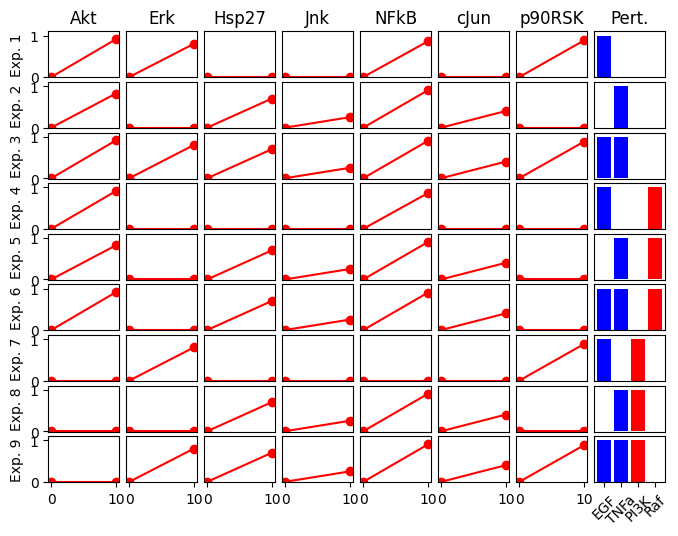

In [9]:
cno.plot_data(exp_list_toy_full)

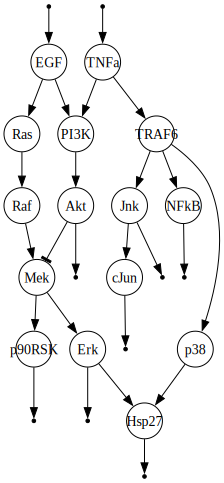

In [18]:
G3_prep = cno.expand_graph_for_flows(G3, exp_list_toy_full)
G3_prep.plot()

In [19]:
P_G3 = cno.cellnoptILP(G3_prep, exp_list_toy_full, verbose=False)

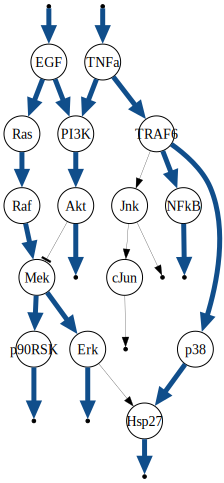

In [20]:
G3_prep.plot(
    custom_edge_attr=cno.cno_style(P_G3, flow_name="edge_activates", scale=None, iexp=3)
)

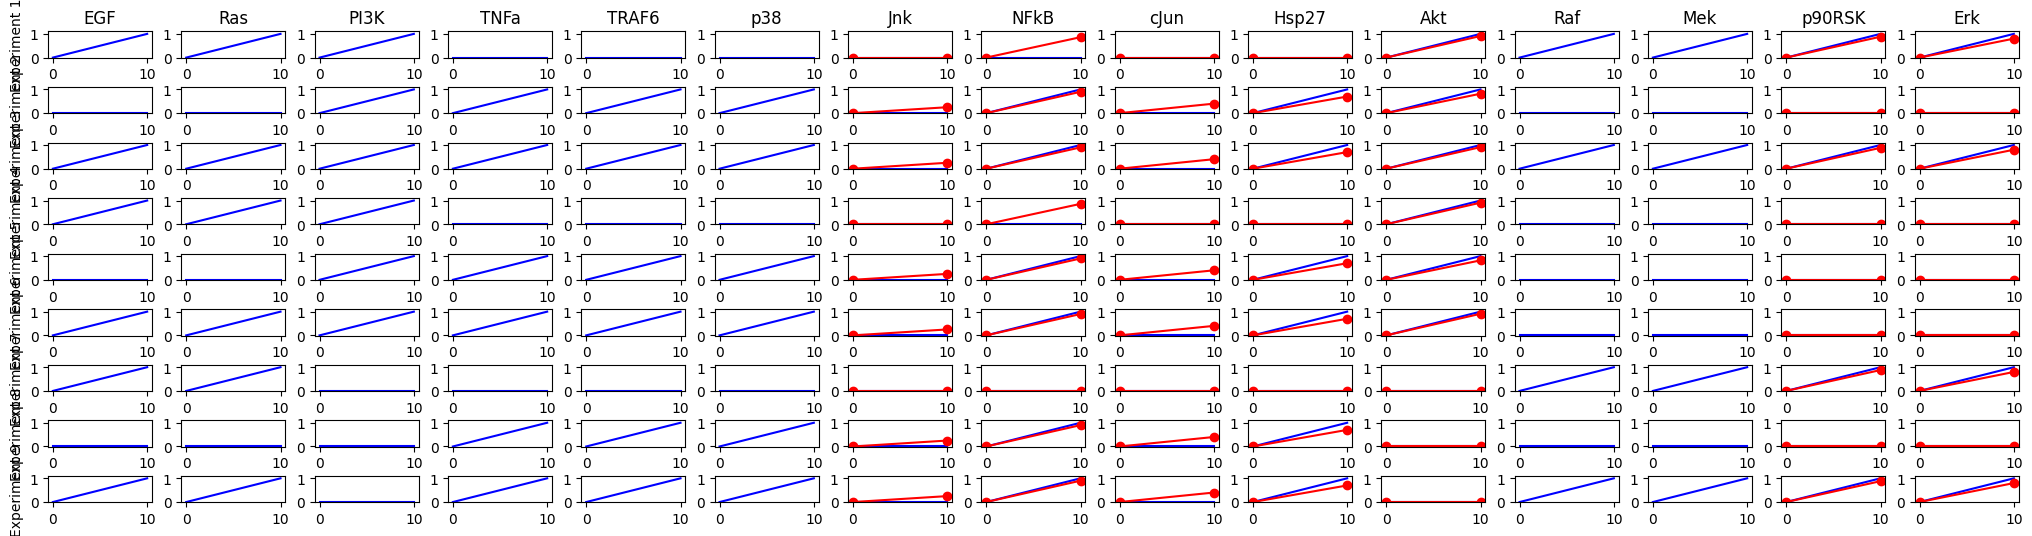

In [21]:
cno.plot_fitness(G3_prep, exp_list_toy_full, P_G3)